## HAC without Education Column

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. Import the data
data_all = pd.read_csv('Present Bias Conditions DF_Cat.csv')

data_all.columns

Index(['Age Group', 'Gender', 'Education', 'Ethnicity',
       'MFA Familiarity Count', 'Security Beliefs', 'Security Importance',
       'Quick Log In Importance', 'Log In Usability Importance',
       'Log In Convenience Importance', 'Log In Satisfaction',
       'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

In [4]:
# 'MFA Familiarity Count', 'Security Beliefs', 'Security Importance', 
# 'Quick Log In Importance','Log In Usability Importance', 'Log In Convenience Importance',
# 'Log In Satisfaction','MFA Opt In Frequency'
df_cols = data_all[['Security Beliefs','Security Importance', 'Quick Log In Importance', 'MFA Opt In Frequency']]

In [5]:
#drop the present bias column

#data = data_all.drop(['Present Bias'], axis = 1)

#data

In [6]:
# 2. Scale the data
from sklearn.preprocessing import normalize
data_scaled = normalize(df_cols)
data_scaled = pd.DataFrame(data_scaled, columns=df_cols.columns)
data_scaled.head()

,Security Beliefs,Security Importance,Quick Log In Importance,MFA Opt In Frequency
0,0.145479,0.727393,0.654654,0.145479
1,0.161165,0.564076,0.805823,0.080582
2,0.195180,0.585540,0.780720,0.097590
3,0.138675,0.693375,0.693375,0.138675
4,0.138675,0.693375,0.693375,0.138675


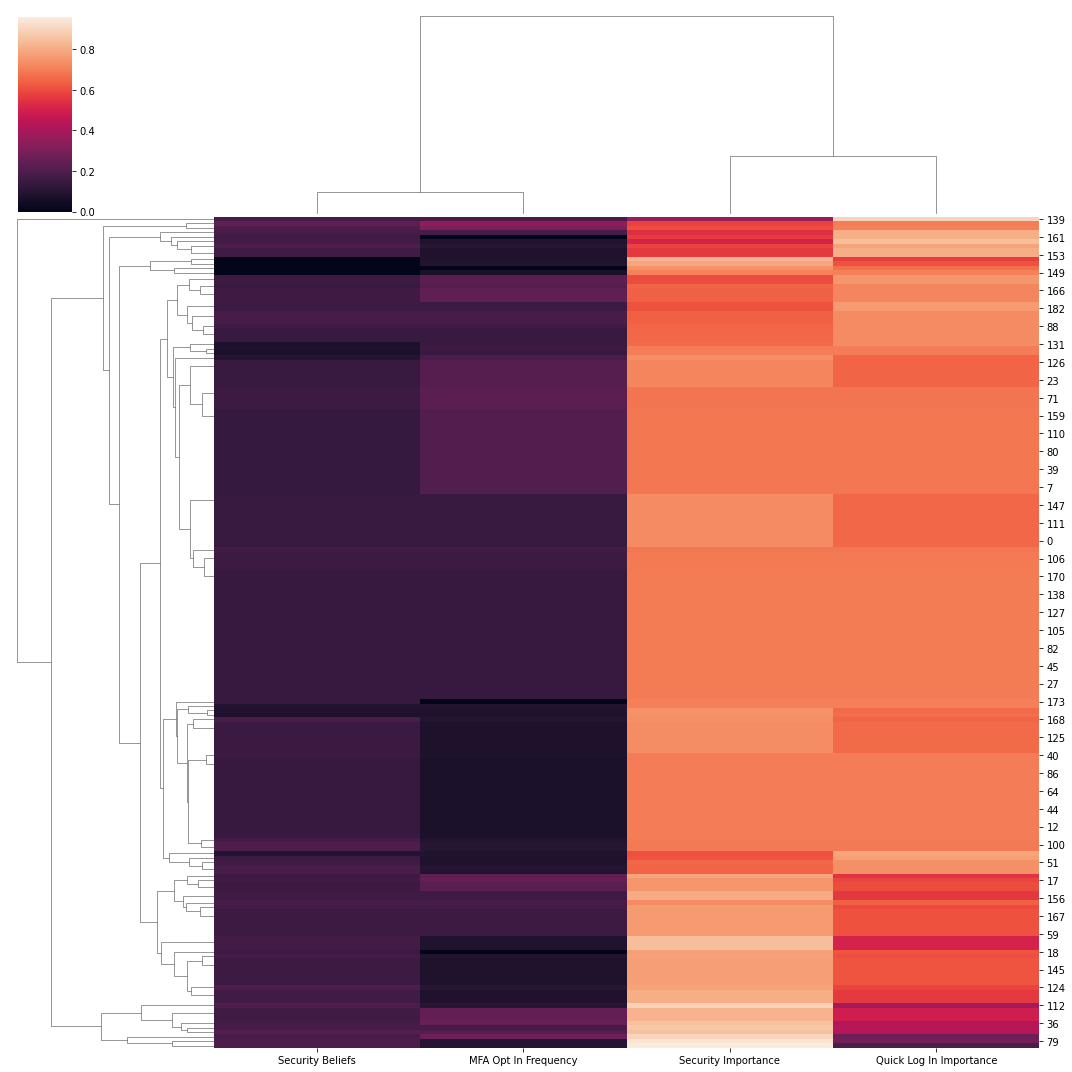

In [7]:
# Importing the library
import seaborn as sns


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data_scaled, figsize=(15, 15))



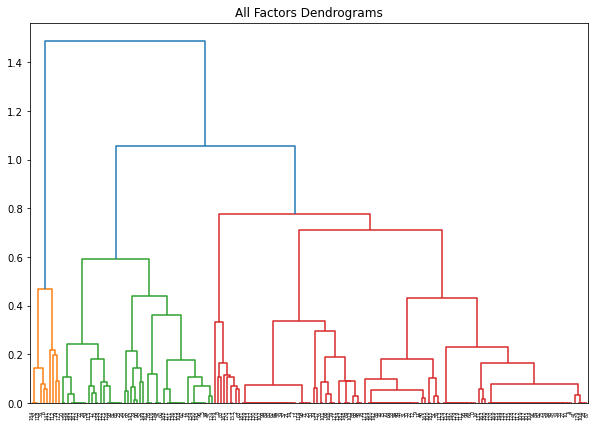

In [8]:
# 3. Cluster the data
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("All Factors Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

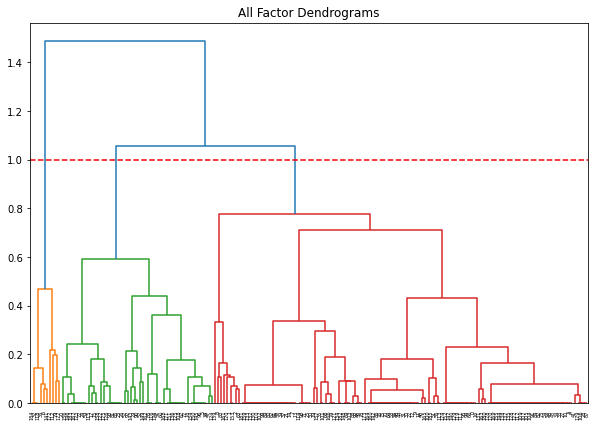

In [9]:
# reset the threshold
plt.figure(figsize=(10, 7))  
plt.title("All Factor Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.0, color='r', linestyle='--')
# red cluster = values of 8,9, 10


In [10]:
data = df_cols.values

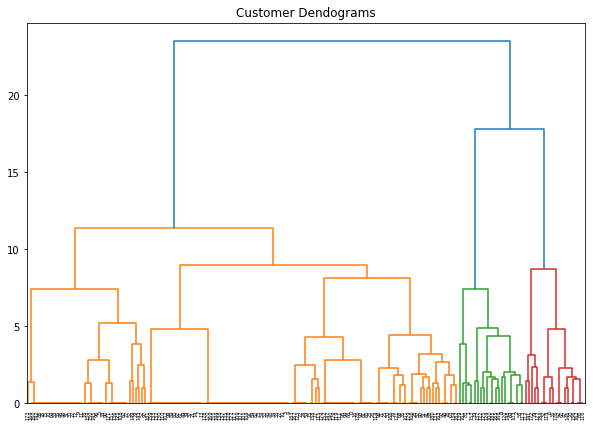

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hac=cluster.fit_predict(df_cols)

In [14]:
# calculate the number of properly clustered 1's and 0's
count_present_bias = (y_hac==1).sum()
count_present_bias # 144/186 (predicted) vs #123/186 (actual)

144

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


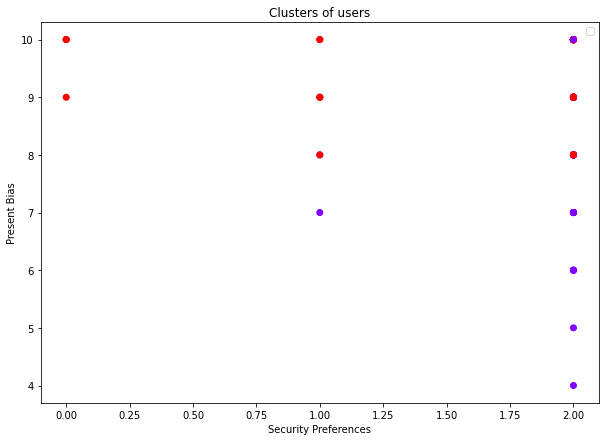

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters of users')
plt.xlabel('Security Preferences')
plt.ylabel('Present Bias')
plt.legend()
plt.show()

In [16]:
# print cluster labels
print(cluster.labels_)

[1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0]


In [17]:
present_bias_colors = data_all.iloc[:,12].map({
    'Yes': 'blue',
    'No': 'red'

})
present_bias_colors[:5]

0    blue
1    blue
2     red
3     red
4     red
Name: Present Bias, dtype: object

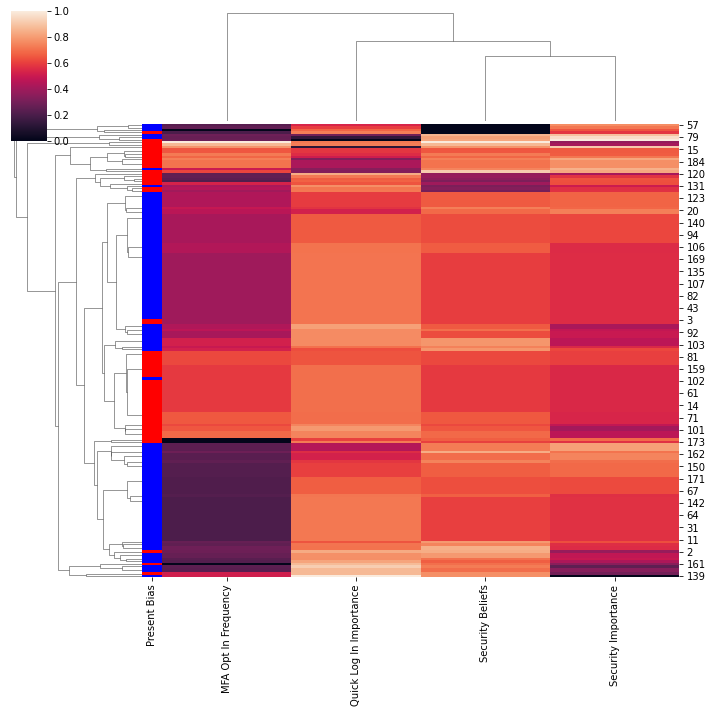

In [18]:
import seaborn as sns


#SCALING COLUMNS


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data_scaled, figsize=(10,10), standard_scale=1, row_colors=present_bias_colors);


#Standard Scale three very different colored. 
#We used standard scale so each column was scaled to be on the same range from 0 to 1
#so each of our columns are on the same scale.
#method changes the linkage - how they're linked. So google the different ones. or scipy to see other
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf

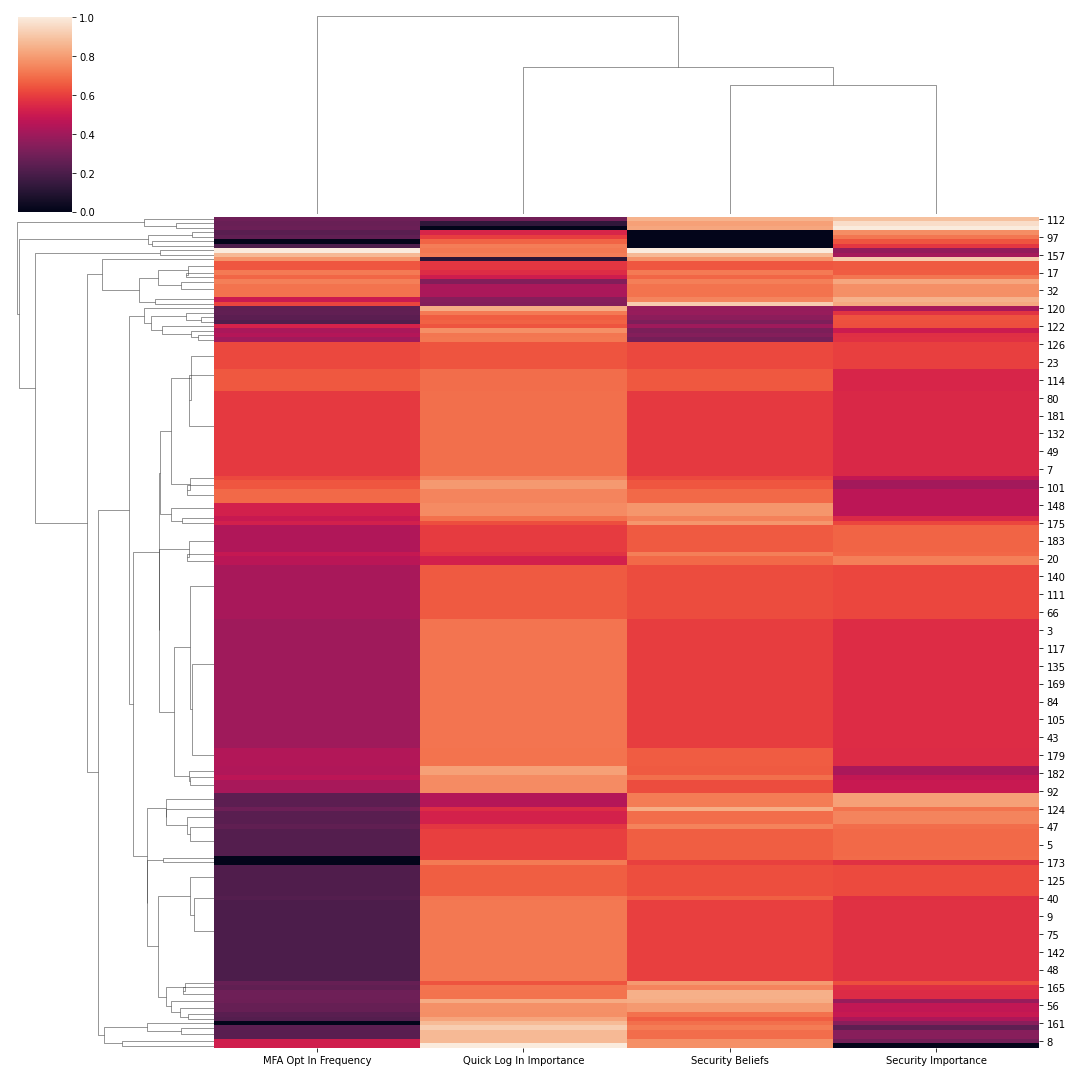

In [19]:
import seaborn as sns


#SCALING COLUMNS


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data_scaled, figsize=(15, 15), standard_scale=1, method='centroid', metric ='euclidean');

#Standard Scale three very different colored. 
#We used standard scale so each column was scaled to be on the same range from 0 to 1
#so each of our columns are on the same scale.
#method changes the linkage - how they're linked. So google the different ones. or scipy to see other
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf

#### Also known as furthest neighbor or maximum method, this method defines the distance between two groups as the distance between their two farthest-apart members. This method usually yields clusters that are well separated and compact.
#### 

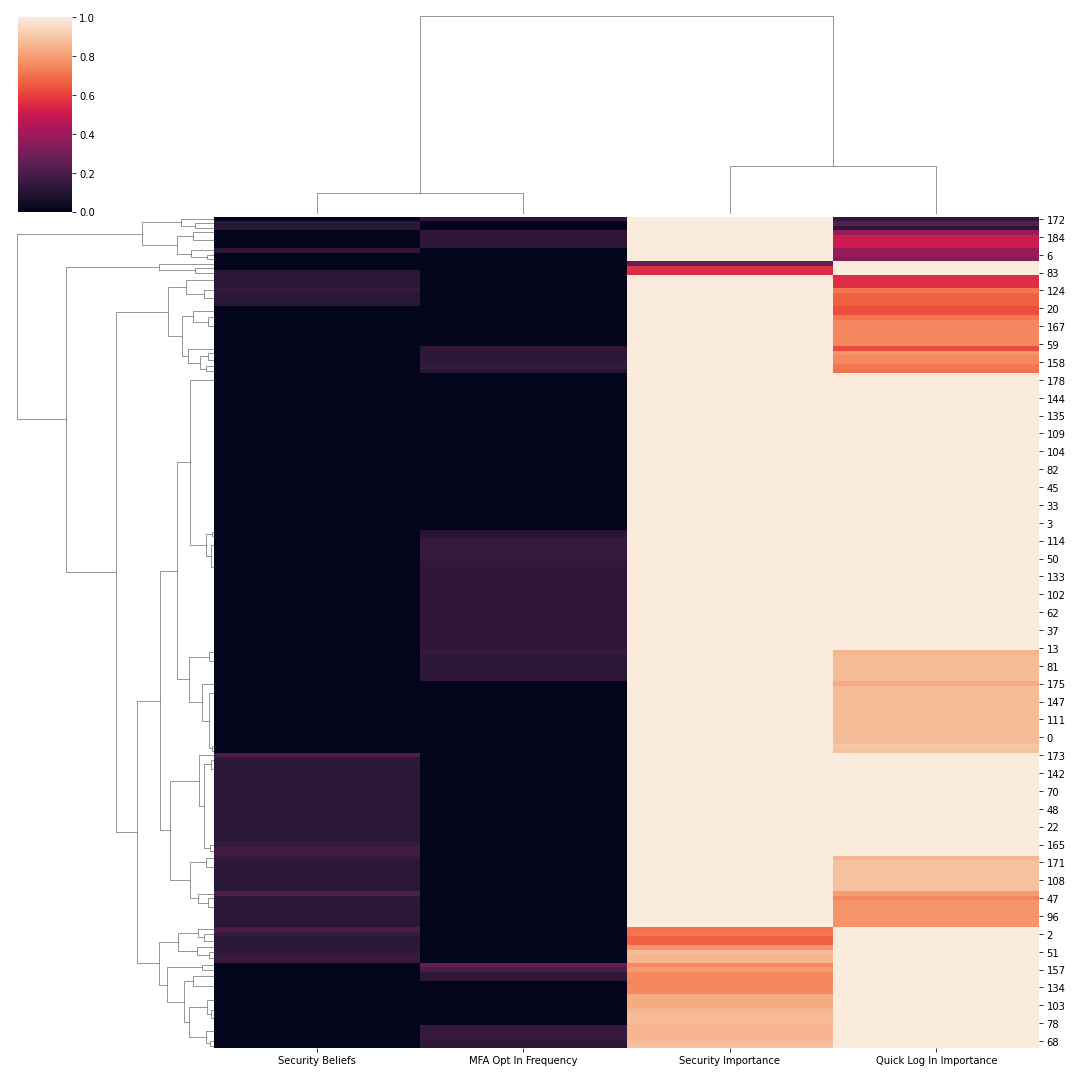

In [20]:
import seaborn as sns


#SCALING ROWS


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data_scaled, figsize=(15, 15), standard_scale=0, method='complete', metric ='euclidean');

#Standard Scale three very different colored. 
#We used standard scale so each column was scaled to be on the same range from 0 to 1
#so each of our columns are on the same scale.
#method changes the linkage - how they're linked. So google the different ones. or scipy to see other
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf

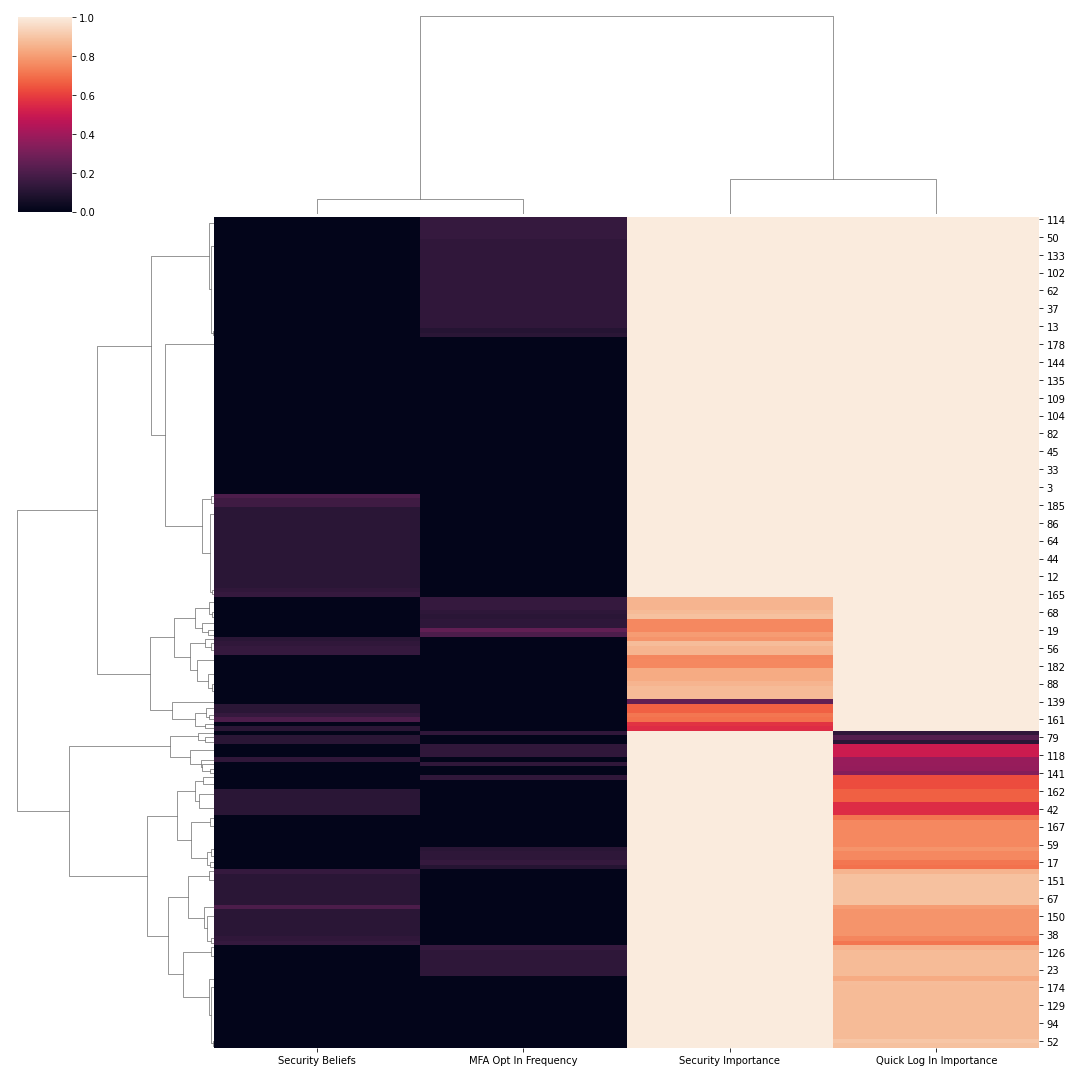

In [21]:
import seaborn as sns


#SCALING ROWS


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data_scaled, figsize=(15, 15), standard_scale=0, method='ward', metric ='euclidean');

#Standard Scale three very different colored. 
#We used standard scale so each column was scaled to be on the same range from 0 to 1
#so each of our columns are on the same scale.
#method changes the linkage - how they're linked. So google the different ones. or scipy to see other
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf

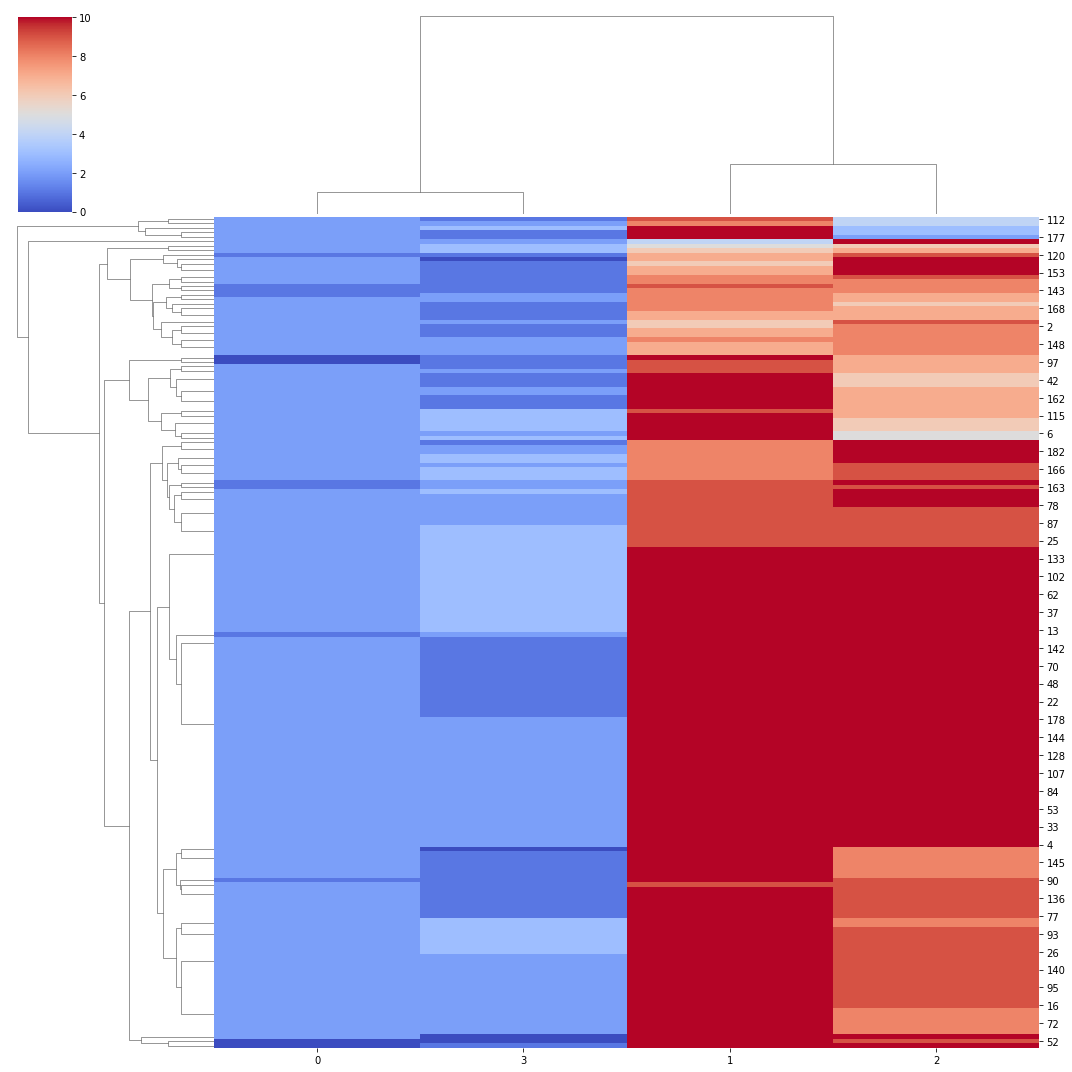

In [22]:
import seaborn as sns


# Clustering data row-wise and
# changing color of the map
sns.clustermap(data, cmap= 'coolwarm', figsize=(15, 15))
